<a href="https://colab.research.google.com/github/Ryoma-HCU/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandasを用いた課題プログラムの作成

入力された母平均・母標準偏差により生成された乱数の母集団から，入力された個数抽出した標本を元に母集団の推定を行うプログラム．

母平均を入力してください：50
母標準偏差を入力してください：10
… 母集団生成中 …
標本数を入力してください：100
信頼度を入力してください [％]：99
母標準偏差は判明しているものとする [ YES | NO ]：YES



,標本,母集団
平均(信頼度99.0％),46.76 ～ 51.91,50.0
標準偏差,10.0,10.0
範囲,14.45 ～ 69.50,11.72 ～ 89.37


<function matplotlib.pyplot.show(close=None, block=None)>

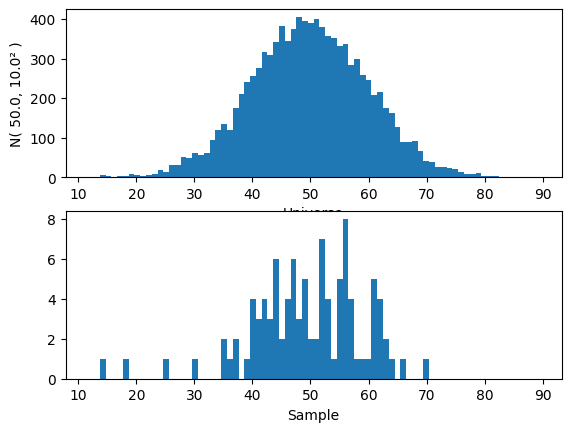

In [16]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import random
import numpy as np

def random_generator(ave,sig):
  df_uni = pd.DataFrame()
  for N in range(10000):
    new_row = {"母集団値" : np.random.normal(ave,sig)}
    df_new = pd.DataFrame(new_row, index=[0])
    df_uni = pd.concat([df_uni, df_new], ignore_index=True )
  return df_uni

def estimation_Norm(n,CI,sig,df_uni):
  df_samp = pd.DataFrame()
  for N in range(n):
    x = random.randint(0,9999)
    new_row = {"標本値" : df_uni["母集団値"].iloc[x]}
    df_new = pd.DataFrame(new_row, index=[0])
    df_samp = pd.concat([df_samp, df_new], ignore_index=True )
  samp_ave = df_samp["標本値"].mean()
  low, high = stats.norm.interval(confidence=CI/100.0, loc=0.0, scale=1.0)
  low = samp_ave + (low*sig/np.sqrt(n))
  high = samp_ave + (high*sig/np.sqrt(n))
  samp_max = df_samp["標本値"].max()
  samp_min = df_samp["標本値"].min()
  df_res = pd.DataFrame([ [str(format(low,".2f"))+" ～ "+str(format(high,".2f"))], [sig], [str(format(samp_min,".2f"))+" ～ "+str(format(samp_max,".2f"))] ])
  df_res.index = ["平均(信頼度"+str(CI)+"％)", "標準偏差", "範囲"]
  df_res.columns = ["標本"]
  return df_samp, df_res

def estimation_T(n,CI):
  df_samp = pd.DataFrame()
  low, high = stats.t.interval(confidence=CI/100.0, loc=0.0, scale=1.0, df=n-1)
  print(low,high)
  return df_samp


average = float(input("母平均を入力してください："))
sigma = float(input("母標準偏差を入力してください："))
print("… 母集団生成中 …")
df_universe = random_generator(average,sigma)
n = int(input("標本数を入力してください："))
confidence = float(input("信頼度を入力してください [％]："))
while True:
  known = input("母標準偏差は判明しているものとする [ YES | NO ]：")
  if known == "YES":
    df_sample, df_result = estimation_Norm(n,confidence,sigma,df_universe)
    break
  elif known == "NO":
    df_sample, df_result = estimation_T(n,confidence)
    break
  else :
    print("YES か NO を入力してください．")

uni_max = df_universe["母集団値"].max()
uni_min = df_universe["母集団値"].min()
df_result["母集団"] = [average,sigma,str(format(uni_min,".2f"))+" ～ "+str(format(uni_max,".2f"))]
print("")
display(df_result)
print("")

plt.subplot(2,1,1)
plt.hist(df_universe["母集団値"], range=(uni_min,uni_max), bins=(int(uni_max) - int(uni_min)))
plt.xlabel("Universe")
plt.ylabel("N( " + str(format(average,".1f")) + ", " + str(format(sigma,".1f")) + "² )")
plt.subplot(2,1,2)
plt.hist(df_sample["標本値"], range=(uni_min,uni_max), bins=(int(uni_max) - int(uni_min)))
plt.xlabel("Sample")
plt.show